<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  EDA & Questions
</div>

In [24]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
cleaned_df = pd.read_csv('../data/processed_data.csv')
cleaned_df.head(10)

,Title,Genre,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
0,iRacing,"Massively Multiplayer, Racing, Simulation, Sports",0,0,iRacing.com Motorsport Simulations,iRacing.com Motorsport Simulations,2906.0,3379.0,473.0,175000.0,0.66,59500.0,2015,1,12,0.828828
1,HumanitZ,"Action, Adventure, RPG, Early Access",0,0,Yodubzz Studios,Freedom Games,1480.0,1940.0,460.0,260000.0,0.20,208000.0,2023,9,18,0.735973
2,Ratopia,"Adventure, Casual, Indie, Simulation, Strategy...",1,0,Cassel Games,Cassel Games,1553.0,1746.0,193.0,260000.0,0.10,234000.0,2023,11,5,0.848305
3,The Exit 8,"Adventure, Indie, Simulation",0,0,KOTAKE CREATE,KOTAKE CREATE,3060.0,3260.0,200.0,59000.0,0.00,59000.0,2023,11,29,0.900236
4,Mind Over Magic,"Simulation, Early Access",0,0,Sparkypants,Klei Publishing,474.0,510.0,36.0,220000.0,0.10,198000.0,2023,12,14,0.863713
5,Cobalt Core,"Indie, Strategy",1,0,Rocket Rat Games,Brace Yourself Games,1230.0,1261.0,31.0,260000.0,0.20,208000.0,2023,11,8,0.920010
6,Dragonheir: Silent Gods,"Adventure, Massively Multiplayer, RPG, Strateg...",0,0,SGRA Studio,Nuverse Pte. Ltd.,1007.0,1544.0,537.0,0.0,0.00,0.0,2023,10,26,0.635512
7,Void Crew,"Action, Adventure, Early Access",0,0,Hutlihut Games,Focus Entertainment,2020.0,2217.0,197.0,286000.0,0.20,228800.0,2023,9,7,0.870706
8,Bopl Battle,Action,0,0,Johan Grönvall,Zapray Games,1928.0,1993.0,65.0,142000.0,0.20,113600.0,2023,11,16,0.919922
9,(the) Gnorp Apologue,"Casual, Indie, Simulation, Strategy",0,0,Myco,(Myco),914.0,942.0,28.0,90000.0,0.00,90000.0,2023,12,14,0.910444


# Kiểm tra tính tương quan của dữ liệu (Correlation)

Kiểm tra tính tương quan dữ liệu giúp ta tìm được các mối quan hệ trong dữ liệu để lọc ra những feature phù hợp cho mô hình dự đoán.

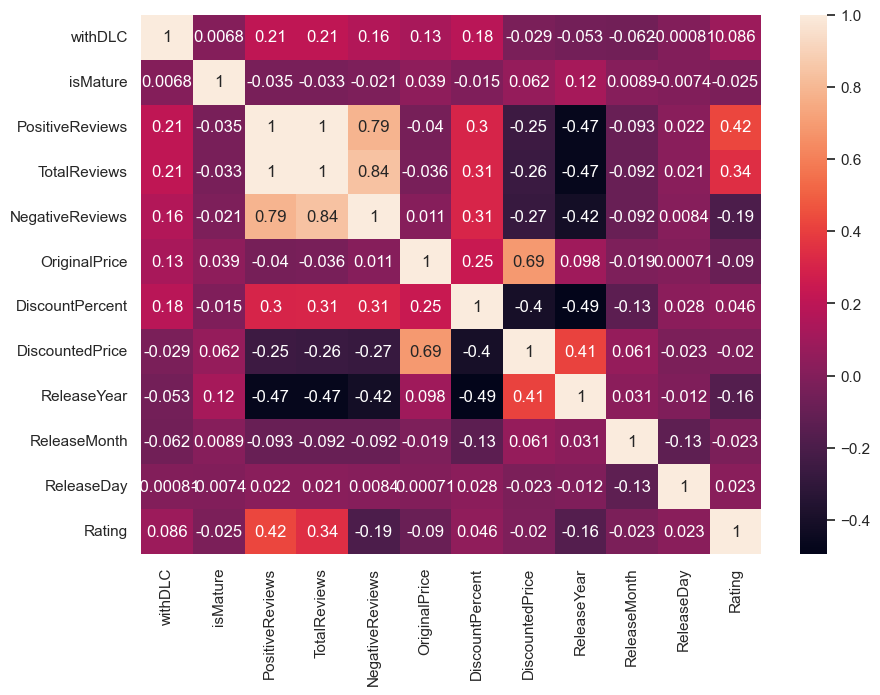

In [26]:
df_copy = cleaned_df.copy()

# calculate correlation matrix
corr_matrix = df_copy.corr(method='spearman', numeric_only=True)

# plot heatmap graph
plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True)
plt.show()


Ta thấy những nơi có tương quan mạnh (cả dương và âm) thường tập trung ở những cột ta đã xét giá trị ngoại lai ở phần **Preprocessing**.
Giờ ta sẽ kiểm tra xem các giá trị này có quan hệ như thế nào.

d:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\qn996\AppData\Local\Temp\ipykernel_12888\863291520.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


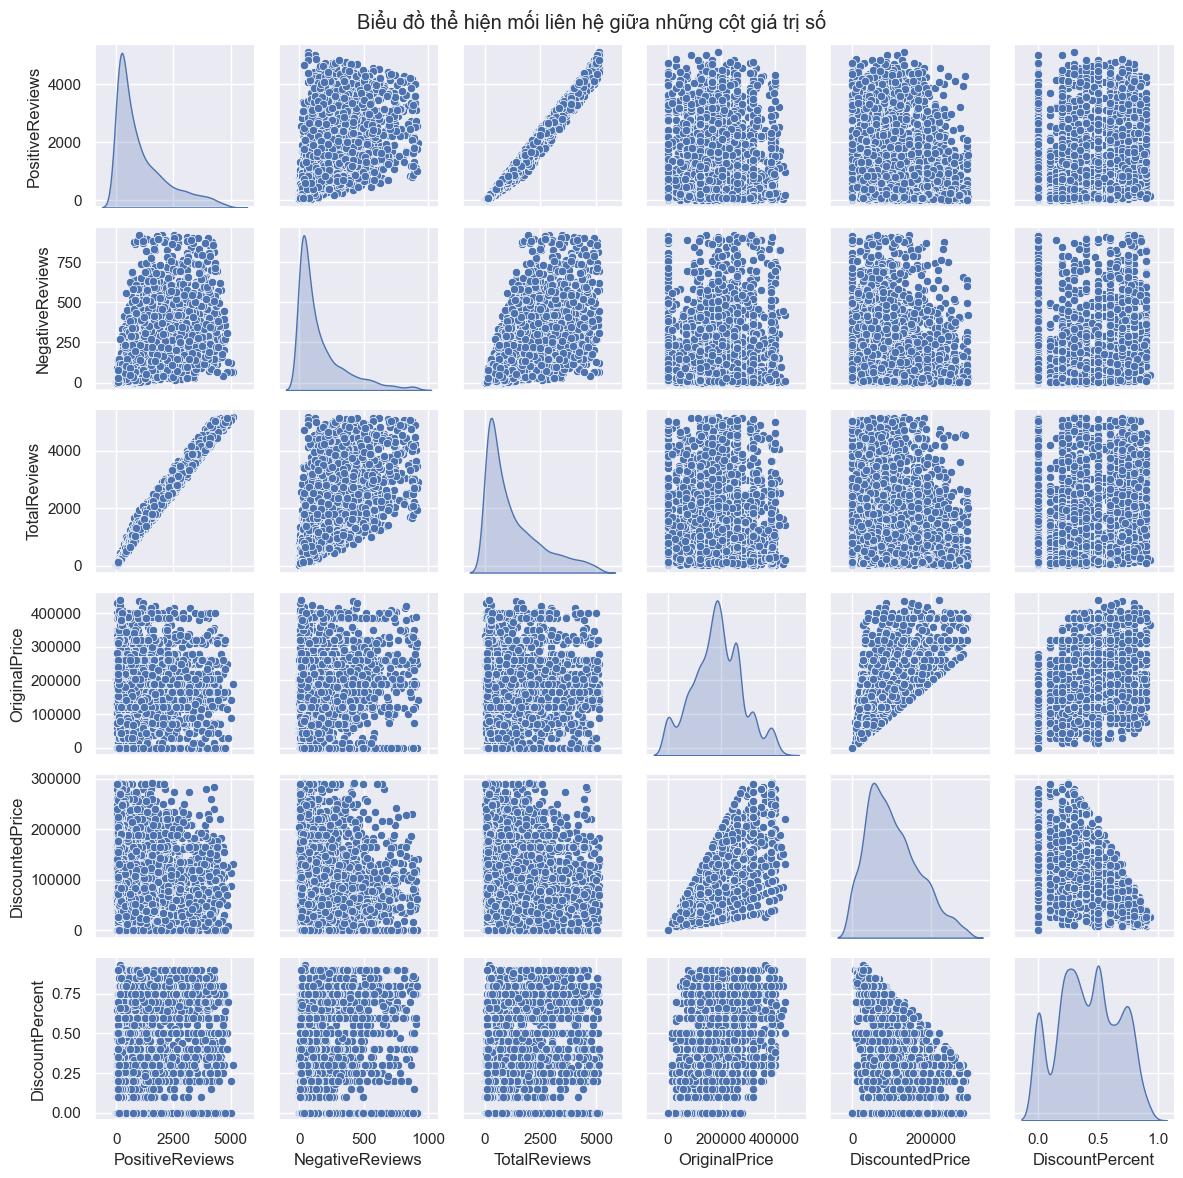

In [27]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'OriginalPrice', 'DiscountedPrice', 'DiscountPercent']
sns.set()
cols = numeric_cols
sns.pairplot(cleaned_df[cols], size = 2 ,kind ='scatter',diag_kind='kde')
plt.suptitle('Biểu đồ thể hiện mối liên hệ giữa những cột giá trị số')
plt.tight_layout()
plt.show()

Các thuộc tính `Reviews` khi xét với `Price` rất hỗn loạn, có nghĩa là Price không có mối tương quan mạnh tới các thuộc tính này -> Giá tiền của game không ảnh hưởng đến đánh giá của người dùng.

**`PositiveReviews` và `NegativeReviews` tăng giảm như nào dựa vào số lượng `TotalReviews`?**

Text(0.5, 0.98, 'Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews')

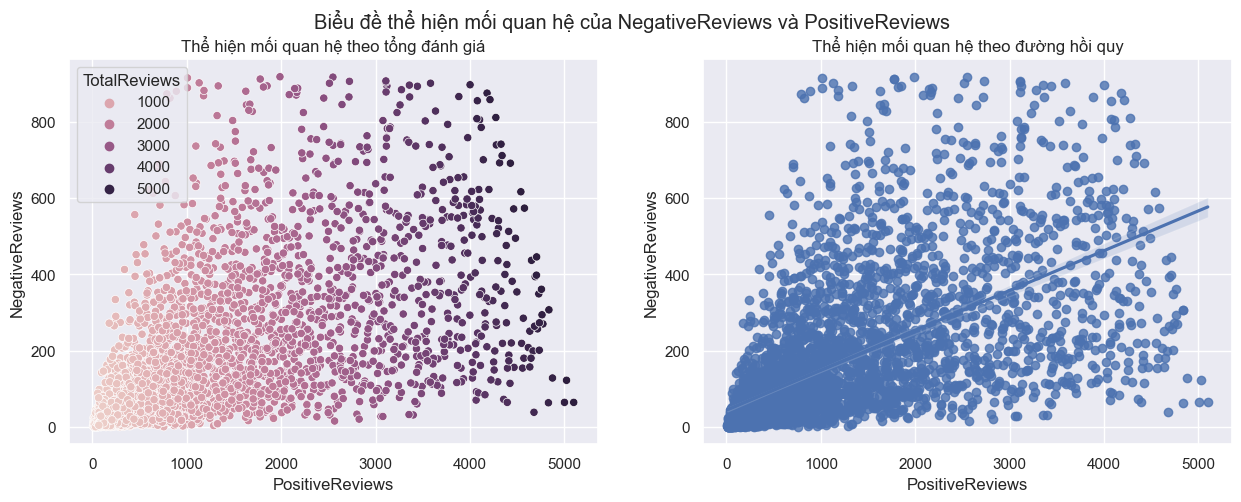

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(x=cleaned_df['PositiveReviews'], y=cleaned_df['NegativeReviews'], hue=cleaned_df['TotalReviews'], ax=axs[0])
sns.regplot(x=cleaned_df['PositiveReviews'], y=cleaned_df['NegativeReviews'], ax=axs[1])
axs[0].set_title('Thể hiện mối quan hệ theo tổng đánh giá')
axs[1].set_title('Thể hiện mối quan hệ theo đường hồi quy')
plt.suptitle('Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews')

Khi `TotalReviews` ít thì các điểm dữ liệu giữa `NegativeReviews` và `PositiveRevies` nằm sát và chi chít lên nhau, chứng tỏ trong khoảng này nó có mối tương quan mạnh.\
Khi `TotalReviews` ngày càng lớn dần, thì khoảng cách các điểm dữ liệu ngày càng nằm rời rạc và cách xa đường hồi quy, lượng `PositiveReviews` ngày càng tăng trong khi `NegativeReviews` ngày càng giảm.

Ta thử kiếm tra xem mối quan hệ giữa `NegativeReviews` và `PositiveReviews` dựa vào `isMature` và `withDLC` như thế nào:

d:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo isMature')

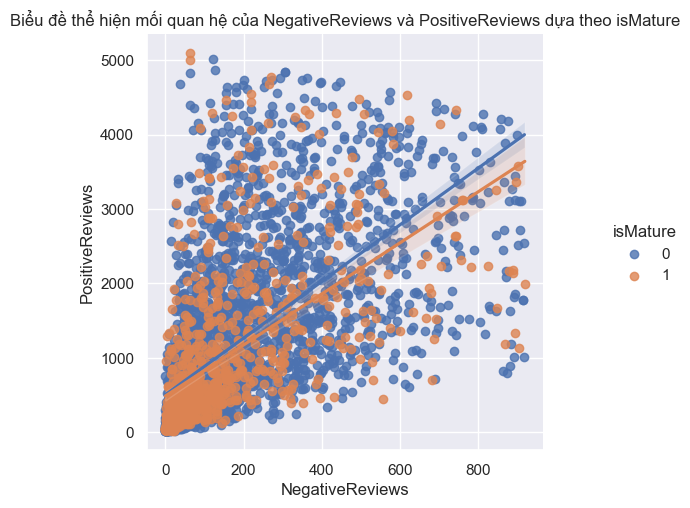

In [29]:
sns.lmplot(x="NegativeReviews", y="PositiveReviews", hue="isMature", data=cleaned_df)
plt.title('Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo isMature')

d:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo withDLC')

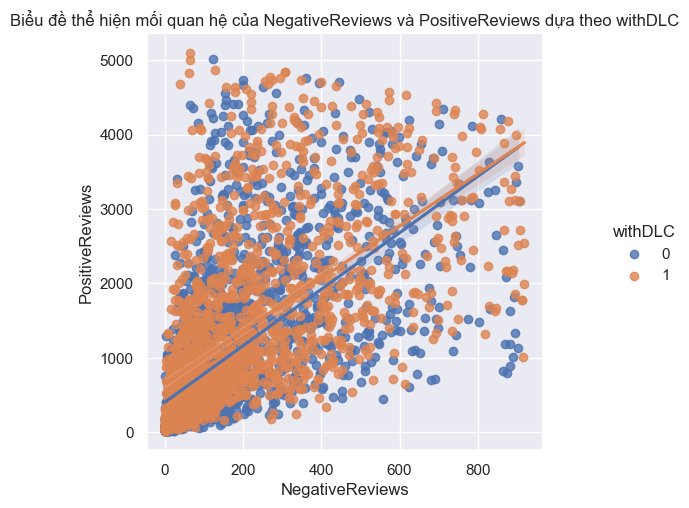

In [30]:
sns.lmplot(x="NegativeReviews", y="PositiveReviews", hue="withDLC", data=cleaned_df)
plt.title('Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo withDLC')

Ta thấy hai đường hồi quy phân loại theo `withDLC` và `isMature` trên mỗi hình sát nhau và gần như là một, do đó những game có **DLC** hay game có **Mature content** không ảnh hưởng quá nhiều khi người chơi đánh giá game.

##### Question 1: Câu hỏi đặt ra là đối với những game có downloadable content (withDLC) thì giá tiền gốc cần để mua game đó có nhiều hơn những game không kèm theo downloadable content hay không?

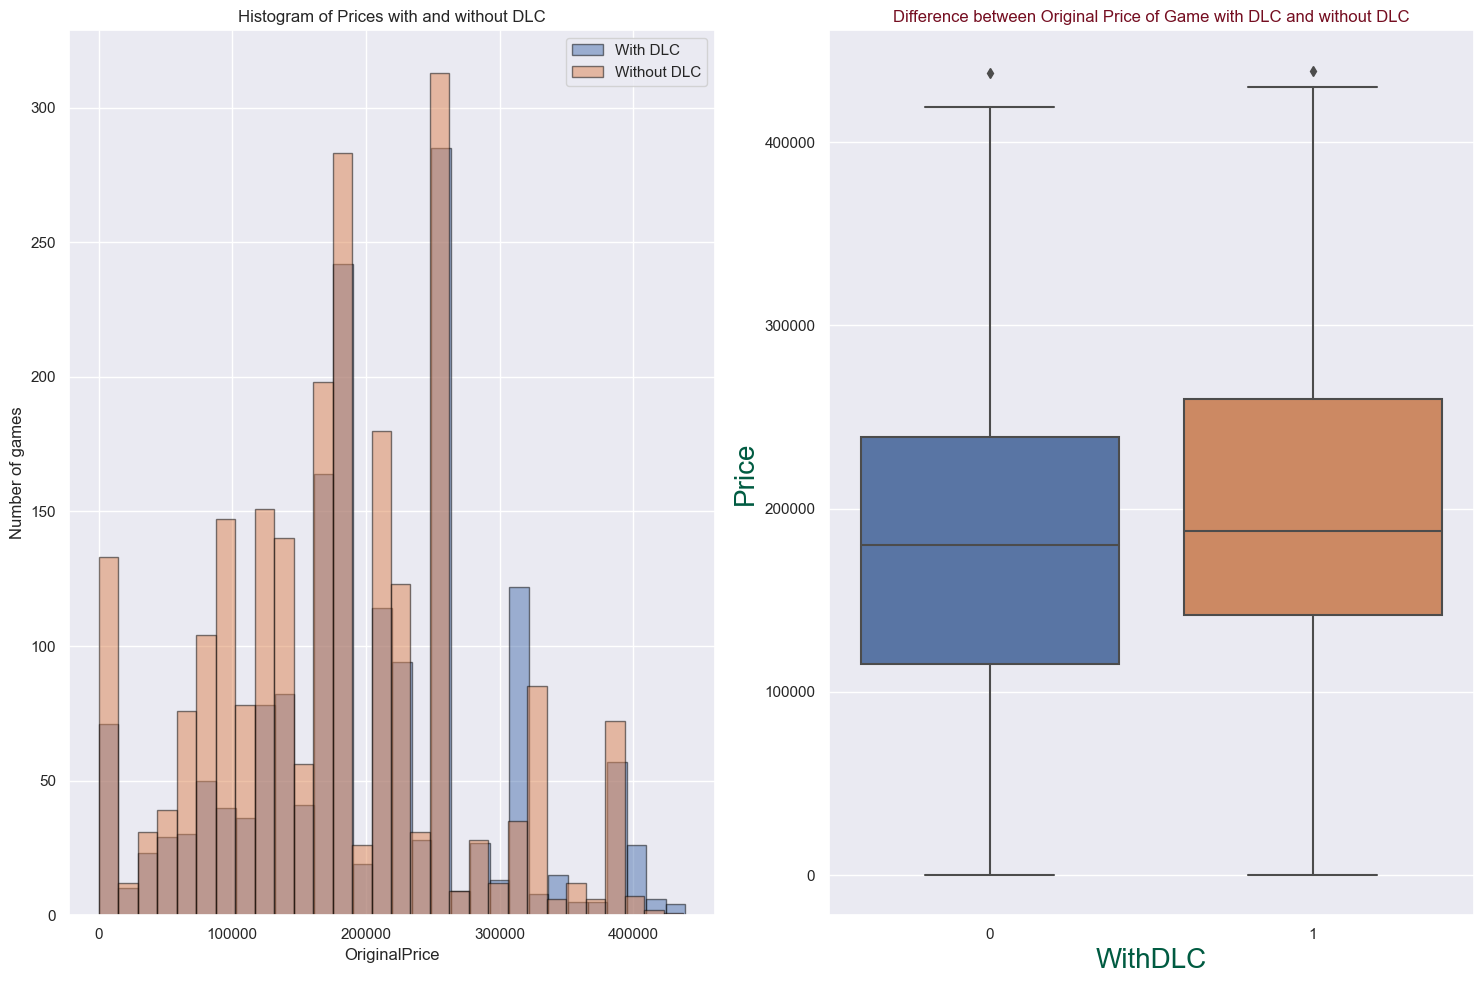

In [34]:
df_with_dlc = cleaned_df[cleaned_df['withDLC'] == 1]
df_without_dlc = cleaned_df[cleaned_df['withDLC'] == 0]

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].hist(df_with_dlc['OriginalPrice'], bins = 30, alpha = 0.5, label = 'With DLC', edgecolor = 'black')
axs[0].hist(df_without_dlc['OriginalPrice'], bins = 30, alpha = 0.5, label = 'Without DLC', edgecolor = 'black')
axs[0].legend(loc = 'upper right')
axs[0].set_title('Histogram of Prices with and without DLC')
axs[0].set_xlabel('OriginalPrice')
axs[0].set_ylabel('Number of games')

sns.boxplot(x = 'withDLC', y = 'OriginalPrice', data = cleaned_df, ax = axs[1])
axs[1].set_title('Difference between Original Price of Game with DLC and without DLC', color = '#750E21')
axs[1].set_xlabel('WithDLC', color = '#005B41', fontsize = 20)
axs[1].set_ylabel('Price', color = '#005B41', fontsize = 20)

plt.tight_layout()
plt.show()

In [36]:
print(df_with_dlc[['withDLC', 'OriginalPrice']].describe())
print(df_without_dlc[['withDLC', 'OriginalPrice']].describe())

       withDLC  OriginalPrice
count   1733.0    1733.000000
mean       1.0  199001.731102
std        0.0   92800.566524
min        1.0       0.000000
25%        1.0  142000.000000
50%        1.0  188000.000000
75%        1.0  260000.000000
max        1.0  439000.000000
       withDLC  OriginalPrice
count   2396.0    2396.000000
mean       0.0  175468.489149
std        0.0   90886.950291
min        0.0       0.000000
25%        0.0  115000.000000
50%        0.0  180000.000000
75%        0.0  239000.000000
max        0.0  437500.000000


d:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

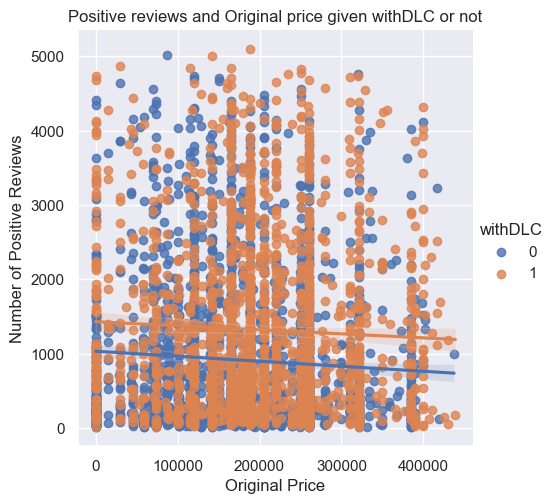

In [37]:
plt.figure(figsize = (20, 10))
sns.lmplot(x = 'OriginalPrice', y = 'PositiveReviews', hue = 'withDLC', data = cleaned_df)

plt.xlabel('Original Price')
plt.ylabel('Number of Positive Reviews')
plt.title('Positive reviews and Original price given withDLC or not')
plt.show()

##### Kết luận: Nhìn vào 2 biểu đồ boxplot và bảng dữ liệu trên, ta có thể thấy giá tiền gốc của game có kèm theo downloadable content có xu hướng cao hơn những game không có mặc dù game không có DLC có số lượng nhiều hơn cùng với sự không liên quan mật thiết gì giữa withDLC và PositiveReviews. Các nhà phát hành game có thể phát triển game cùng với downloadable content để có thể tăng giá thành sản phẩm với mục đích thu lợi nhuận cao hơn mà không ảnh hưởng tiêu cực đến đánh giá của người dùng về game

### Question 2: Mỗi thể loại game thường được giảm giá như thế nào?
Thông thường, ta hay cho rằng những sản phẩm giảm giá nhiều có nghĩa là những món đó đã cũ hoặc đã lỗi thời, thế còn game thì sao?

Việc mỗi thể loại game giảm giá nhiều hay ít có ảnh hưởng gì tới việc những thể loại game đó có đang là xu hướng trong thị trường game hiện tại hay không? Điều này có quyết định đến việc phát triển một game hay không?

Đầu tiên, ta lấy cột `Genre` và `DiscountPercent`

In [ ]:
genre_df = cleaned_df[['Genre', 'DiscountPercent']]
genre_df

,Genre,DiscountPercent
0,"Massively Multiplayer, Racing, Simulation, Sports",0.66
1,"Action, Adventure, RPG, Early Access",0.20
2,"Adventure, Casual, Indie, Simulation, Strategy...",0.10
3,"Adventure, Indie, Simulation",0.00
4,"Simulation, Early Access",0.10
...,...,...
4124,"Action, Adventure",0.70
4125,"Adventure, Casual, Simulation",0.50
4126,"Adventure, Casual, Indie",0.15
4127,"Indie, Simulation, Strategy",0.20


Vì `Genre` là một cột đặc biệt, vì mỗi sample có thể có nhiều thể loại, do đó để thể hiện rõ những thể loại nào đang phát triển, ta sẽ chia `Genre` ra thành từng sample:

In [ ]:
explode_genre_df = genre_df.assign(Genre=genre_df['Genre'].str.split(', ')).explode('Genre')
explode_genre_df = explode_genre_df.reset_index(drop=True)
explode_genre_df

,Genre,DiscountPercent
0,Massively Multiplayer,0.66
1,Racing,0.66
2,Simulation,0.66
3,Sports,0.66
4,Action,0.20
...,...,...
11644,Indie,0.20
11645,Simulation,0.20
11646,Strategy,0.20
11647,Adventure,0.70


Tính trung bình `DiscountPercent` của từng `Genre`

In [ ]:
mean_discount_df = explode_genre_df.groupby('Genre')['DiscountPercent'].mean().reset_index()
mean_discount_df.sort_values(by=['DiscountPercent'], inplace=True)

Thể hiện giá trị lên đồ thị:

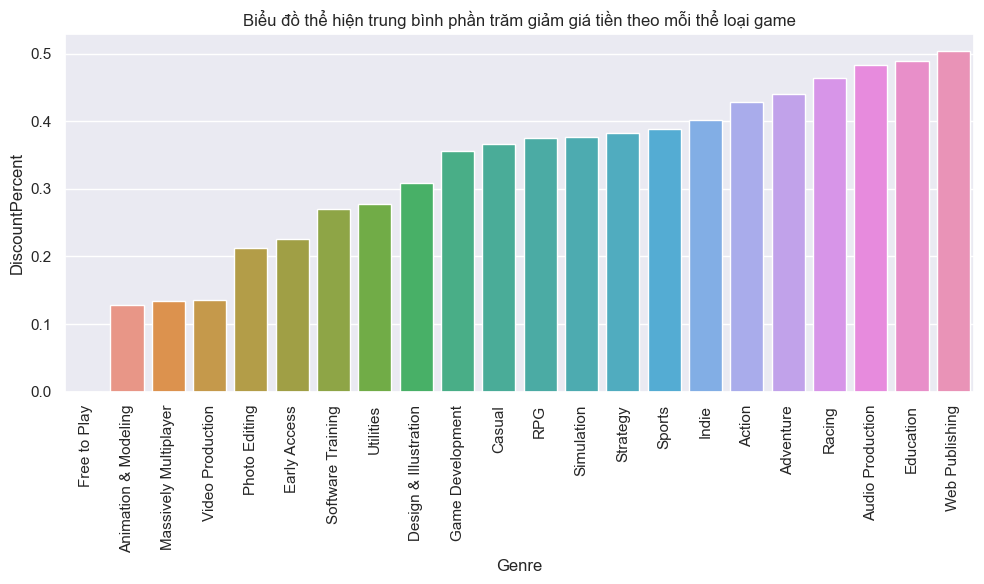

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(mean_discount_df, x='Genre', y='DiscountPercent', ax=ax)
plt.xticks(rotation=90)
plt.title('Biểu đồ thể hiện trung bình phần trăm giảm giá tiền theo mỗi thể loại game')
plt.tight_layout()

Có vẻ như phần lớn các thể loại game đều có discount trên 30%, chỉ có một số thể loại có discount thấp (Animation & Modeling, Massive Multiplayer,...) chỉ discount dưới 20%. Tuy nhiên đây thường là những thể loại game mang tính giáo dục hơn là giải trí (chẳn hạn như Video Production, Photo Editing), trong khi đó những thể loại game mang tính giải trí, có sức hút nhiều hơn thì discount vẫn trên 30%. 

Vậy ta có thể kết luận game giảm giá nhiều hay ít không ảnh hưởng gì nhiều đến việc những thể loại game đó có đang hot hay không.

Đây là chỉ là đánh giá mang tính chủ quan. Vì mỗi game có một hoặc rất nhiều thể loại, có discount khác nhau. Do đó xử lí như này sẽ không đánh giá đúng 100%, tuy nhiên nó cũng cho chúng ta 1 góc nhìn chung về những game có thể loại như vậy thường có lượng discount trung bình như thế nào.

### Question 3: Những game được nhiều sự quan tâm đánh giá từ người chơi, có khuyến mãi như thế nào ??
Ở câu hỏi 2, ta đã tìm hiểu mỗi thể loại game giảm giá nhiều hay ít ảnh hưởng như thế nào đến xu hướng phát triển của game đó. Vậy những game có khuyến mãi lớn có được người dùng quan tâm nhiều hay không?

Ta có thể phân vùng đánh giá game như sau:\
**0% - 19%:** Negative\
**20% - 39%:** Mostly Negative\
**40% - 69%:** Mixed\
**70% - 79%:** Mostly Positive\
**80% - 100%:** Positive

Do data cào về khá chênh lệch về số lượng game được làm theo từng năm, nên ta sẽ lấy năm 2022 và 2023 để đối chiếu và so sánh.

In [ ]:
discount_2022 = cleaned_df.loc[(cleaned_df['ReleaseYear'] == 2022), ['Rating', 'DiscountPercent']]
discount_2023 = cleaned_df.loc[(cleaned_df['ReleaseYear'] == 2023), ['Rating', 'DiscountPercent']]

def classify_percentage(percentage):
    if percentage >= 0 and percentage < 0.2:
        return 'Negative'
    elif percentage >= 0.2 and percentage < 0.4:
        return 'Mostly Negative'
    elif percentage >= 0.4 and percentage < 0.7:
        return 'Mixed'
    elif percentage >= 0.7 and percentage < 0.8:
        return 'Mostly Positive'
    elif percentage >= 0.8 and percentage <= 1:
        return 'Positive'
    else:
        return 'Invalid'

discount_2023['Conclusion'] = discount_2023['Rating'].apply(classify_percentage)
discount_2022['Conclusion'] = discount_2022['Rating'].apply(classify_percentage)

Ta tính giá trị trung bình của `DiscountPercent` cho năm 2022 và 2023

In [ ]:
mean_2022 = discount_2022.groupby(['Conclusion'])['DiscountPercent'].mean()
mean_2022 = mean_2022.to_frame().rename(columns= {'DiscountPercent': 'MeanDiscountPercent'}).reset_index()
mean_2023 = discount_2023.groupby(['Conclusion'])['DiscountPercent'].mean()
mean_2023 = mean_2023.to_frame().rename(columns= {'DiscountPercent': 'MeanDiscountPercent'}).reset_index()

Tạo đồ thị violinplot để so sánh sự phân bố của từng mức `Conclusion`:

[Text(0.5, 99.24999999999997, 'Rating Conclusion'),
 Text(130.5, 0.5, 'Discount Percent')]

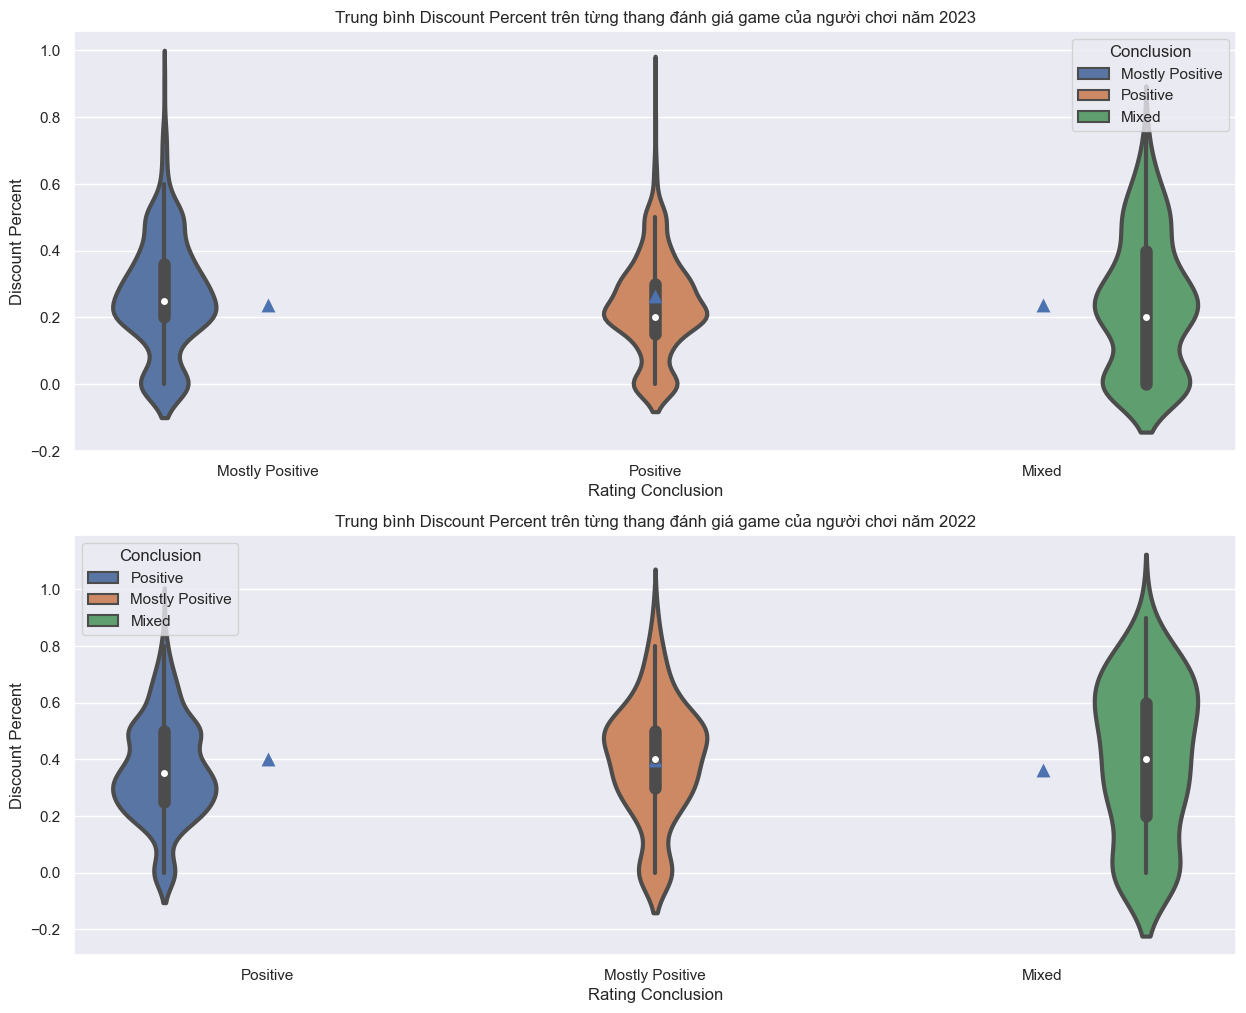

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.swarmplot(data = mean_2023, x = 'Conclusion', y = 'MeanDiscountPercent', ax = axes[0], marker = '^', s = 10, dodge= True)
sns.swarmplot(data = mean_2022, x = 'Conclusion', y = 'MeanDiscountPercent', s = 10,ax = axes[1], marker = '^', dodge= True)

sns.violinplot(data = discount_2023, x = 'Conclusion', y = 'DiscountPercent', hue='Conclusion', linewidth=3, ax=axes[0])
sns.violinplot(data = discount_2022, x = 'Conclusion', y = 'DiscountPercent', hue='Conclusion', linewidth=3, ax=axes[1])
axes[0].set_title('Trung bình Discount Percent trên từng thang đánh giá game của người chơi năm 2023')
axes[1].set_title('Trung bình Discount Percent trên từng thang đánh giá game của người chơi năm 2022')
axes[0].set(xlabel = 'Rating Conclusion', ylabel = 'Discount Percent')
axes[1].set(xlabel = 'Rating Conclusion', ylabel = 'Discount Percent')

Dựa vào biểu đồ, ta thấy sự biến động của các kết luận đánh giá dựa vào DiscountPercent trung bình trong năm 2023 và năm 2022 là có khác nhau đôi chút:
- Với năm 2023, theo mỗi loại đánh giá, lượng người chơi đánh giá nhiều nhất cũng là nơi mà tại đó cũng chính là giá trị trung bình của `DiscountPercent`, và giá trị trung bình nằm ở khoảng xấp xỉ **25%**.
- Trước đó, năm 2022 có giá trị trung bình `DiscountPercent` nằm ở khoảng **40%**, trùng với giá trị median của từng `Conclusion`. Tuy nhiên, số lượng người chơi đánh giá game nhiều nhất không nằm ngay trong khoảng này, mà nó có thể nằm bất kì đâu (như `Mixed` thì nhiều nhất khi `DiscountPercent` khoảng **60%**, `Mostly Positive` là **45%** và `Positive` là khoảng **30%**), số lượng người chơi đánh giá game cũng trải rộng hơn chứ không tập trung vào một số `DiscountPercent` nhất định, và số lượng người chơi đánh giá cũng tăng dần trong khoảng trung bình của nó **(20% - 40%)**.

Vậy với sự khác biệt giữa sự phân bố của từng mức đánh giá trong năm 2023 và 2022 có ý nghĩa gì không?\
**Dự đoán:** nhìn vào biểu đồ, ta có thể giúp thấy thường những vùng mà có chứa `DiscountPercent` trung bình là tập trung nhiều lượng người chơi đánh giá nhất hoặc đó là vùng cũng có một số lượng lớn người chơi đánh giá. Điều này có thể giúp cho các nhà phát triển có thể đưa ra được một chiến lược giảm giá phù hợp để vừa có thể giữ được lợi nhuận cho game và đạt được một số lượng người chơi tốt.

### Question 4: Thể loại game nào được các nhà phát triển ưa chuộng và mang lại Rating cao cho game ???

#### Ta có thể thấy được thể loại game Indie được phát triển, phát hành nhiều nhất trong các thể loại game và dựa vào rating có thể kết luận rằng: Indie là thể loại game khá được người dùng ưa thích. Mặt khác, Photo Editing là thể loại game ít phổ biến ở các game nhưng cũng được đón nhận không kém -> Các nhà làm game và phát hành nên cân nhắc đầu tư cũng như phát triển nhiều hơn thể loại game này

C:\Users\qn996\AppData\Local\Temp\ipykernel_11160\2593633287.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_counts.index, rotation=90)


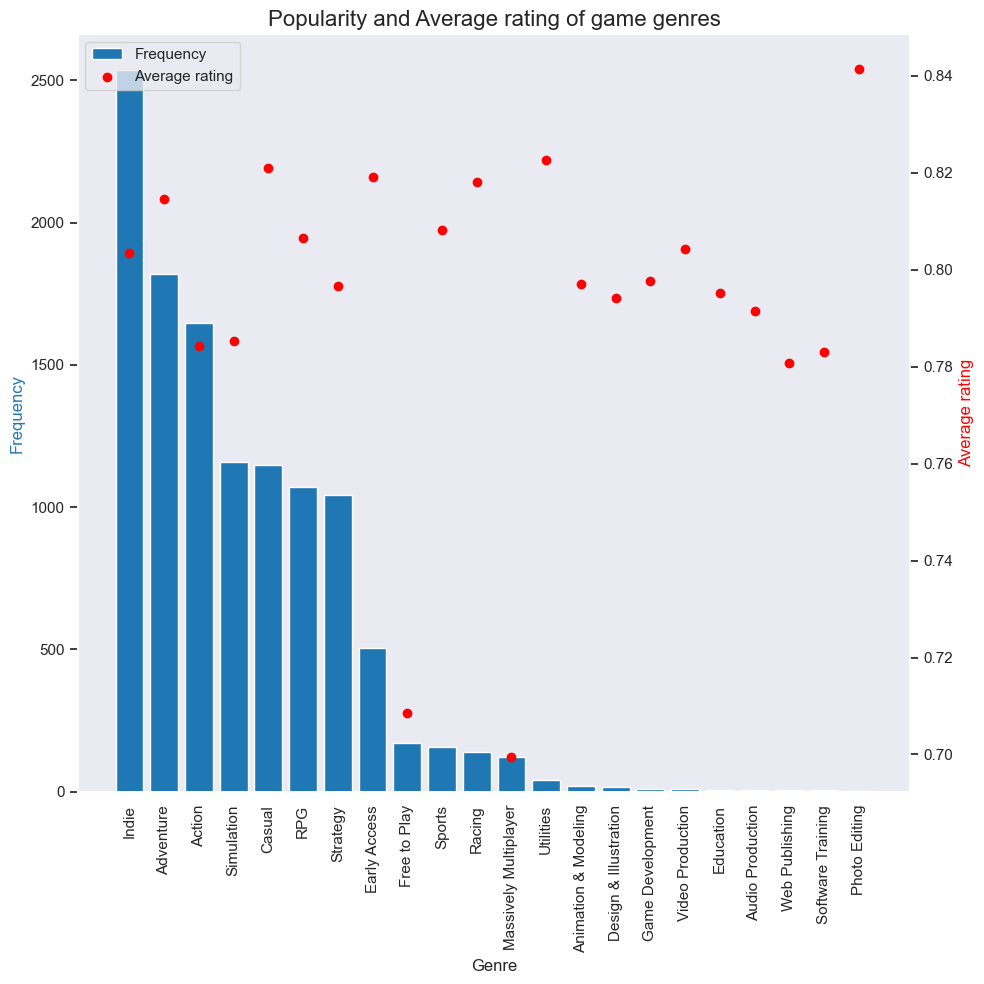

In [ ]:
copy_df = cleaned_df.copy()
copy_df['Genre'] = copy_df['Genre'].str.split(', ')
genre_counts = copy_df.explode('Genre')['Genre'].value_counts()
average_ratings_genre = copy_df.explode('Genre').groupby('Genre')['Rating'].mean()

average_ratings_genre = average_ratings_genre.reindex(genre_counts.index)

# bar plot to visualize the popularity of each genre
fig, ax = plt.subplots(figsize = (10, 10))
bars = ax.bar(genre_counts.index, genre_counts.values, color = '#1f77b4')
ax.set_xlabel('Genre')
ax.set_xticklabels(genre_counts.index, rotation=90)
ax.set_ylabel('Frequency', color = '#1f77b4')
ax.grid(False)

ax1 = ax.twinx()
scatters = ax1.scatter(average_ratings_genre.index, average_ratings_genre.values, color = 'red')
ax1.set_ylabel('Average rating', color = 'red')
ax1.grid(False)

plt.title('Popularity and Average rating of game genres', fontsize = 16)
plt.legend([bars, scatters], ['Frequency', 'Average rating'], loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
print(average_ratings_genre)
print(genre_counts)

Genre
Indie                    0.818184
Adventure                0.814557
Action                   0.803384
Simulation               0.797693
Casual                   0.820927
RPG                      0.797110
Strategy                 0.791481
Early Access             0.796650
Free to Play             0.708507
Sports                   0.795159
Racing                   0.794242
Massively Multiplayer    0.699414
Utilities                0.780740
Animation & Modeling     0.784302
Design & Illustration    0.806452
Game Development         0.808173
Video Production         0.782976
Education                0.819175
Audio Production         0.785302
Web Publishing           0.841427
Software Training        0.804327
Photo Editing            0.822671
Name: Rating, dtype: float64
Genre
Indie                    2535
Adventure                1821
Action                   1648
Simulation               1158
Casual                   1149
RPG                      1072
Strategy                 1043
E

### Câu hỏi 5: Nhà phát triển game nào có tiềm năng phát triển nhất?
Để trả lời câu hỏi này trước tiên ta sẽ xem xét có bao nhiêu nhà phát triển trong bộ dữ liệu.   
Sau đó chọn ra các nhà phát triển có các game ở mức rating cao và xem xét các game từ trước đến hiện tại của các developer đó và vẽ biểu đồ thể hiện xu hướng.

Xem xét các developer:

In [ ]:
dev_df = cleaned_df['Developer'].value_counts()

# Number of dev
len(dev_df)

3107

Có khá nhiều Developer, để dễ dàng quan sát và phân tích ta chỉ xét các nhà phát triển gần đây, cụ thể từ **01/2017** đến nay. 

Sau đó lấy top 5 nhà phát triển đã có nhiều đánh giá từ người chơi nhất để phân tích.

In [ ]:
# Release date from 2017-01
steam_df = cleaned_df.copy()
steam_df = steam_df[(steam_df['ReleaseYear'] >= 2017)]

# Top 5 Developer
top5_dev_df = steam_df.groupby('Developer')['TotalReviews'].sum().nlargest(5)
top5_dev_df = steam_df[steam_df['Developer'].isin(top5_dev_df.index)][['Developer', 'Title', 'ReleaseYear', 'ReleaseMonth', 'Rating']]

top5_dev_df['ReleaseYear'] = top5_dev_df['ReleaseYear'].astype(str)
top5_dev_df['ReleaseMonth'] = top5_dev_df['ReleaseMonth'].astype(str)

# Combine 'year' and 'month' and convert to datetime
top5_dev_df['ReleaseYM'] = pd.to_datetime(top5_dev_df['ReleaseYear'] + top5_dev_df['ReleaseMonth'], format='%Y%m').dt.strftime('%Y-%m').values

top5_dev_df.drop(['ReleaseYear', 'ReleaseMonth'], axis=1, inplace=True)
top5_dev_df

,Developer,Title,Rating,ReleaseYM
165,Tamsoft,SENRAN KAGURA Peach Beach Splash,0.778657,2018-03
296,Tamsoft,SENRAN KAGURA Burst Re:Newal,0.887733,2019-01
319,Marvelous Inc.,Fate/EXTELLA LINK,0.896589,2019-03
341,Tamsoft,SENRAN KAGURA ESTIVAL VERSUS,0.912173,2017-03
401,Marvelous Inc.,STORY OF SEASONS: Friends of Mineral Town,0.906687,2020-07
550,"INTI CREATES CO., LTD.",Gal Guardians: Demon Purge,0.764611,2023-02
639,Marvelous Inc.,STORY OF SEASONS: Pioneers of Olive Town,0.810417,2021-09
644,"INTI CREATES CO., LTD.",Gal*Gun 2,0.814429,2018-07
661,Amanita Design,Creaks,0.910803,2020-07
689,Tamsoft,SENRAN KAGURA Peach Ball,0.837300,2019-08


In [ ]:
grouped_df = top5_dev_df.groupby('Developer')
grouped_df

Vẽ biểu đồ **line chart** thể hiện xu hướng của top 5 Developer:
- Lấy ra group mỗi Developer.
- Sử dụng **sort_values** để sắp xếp thứ tự ngày phát hành game.

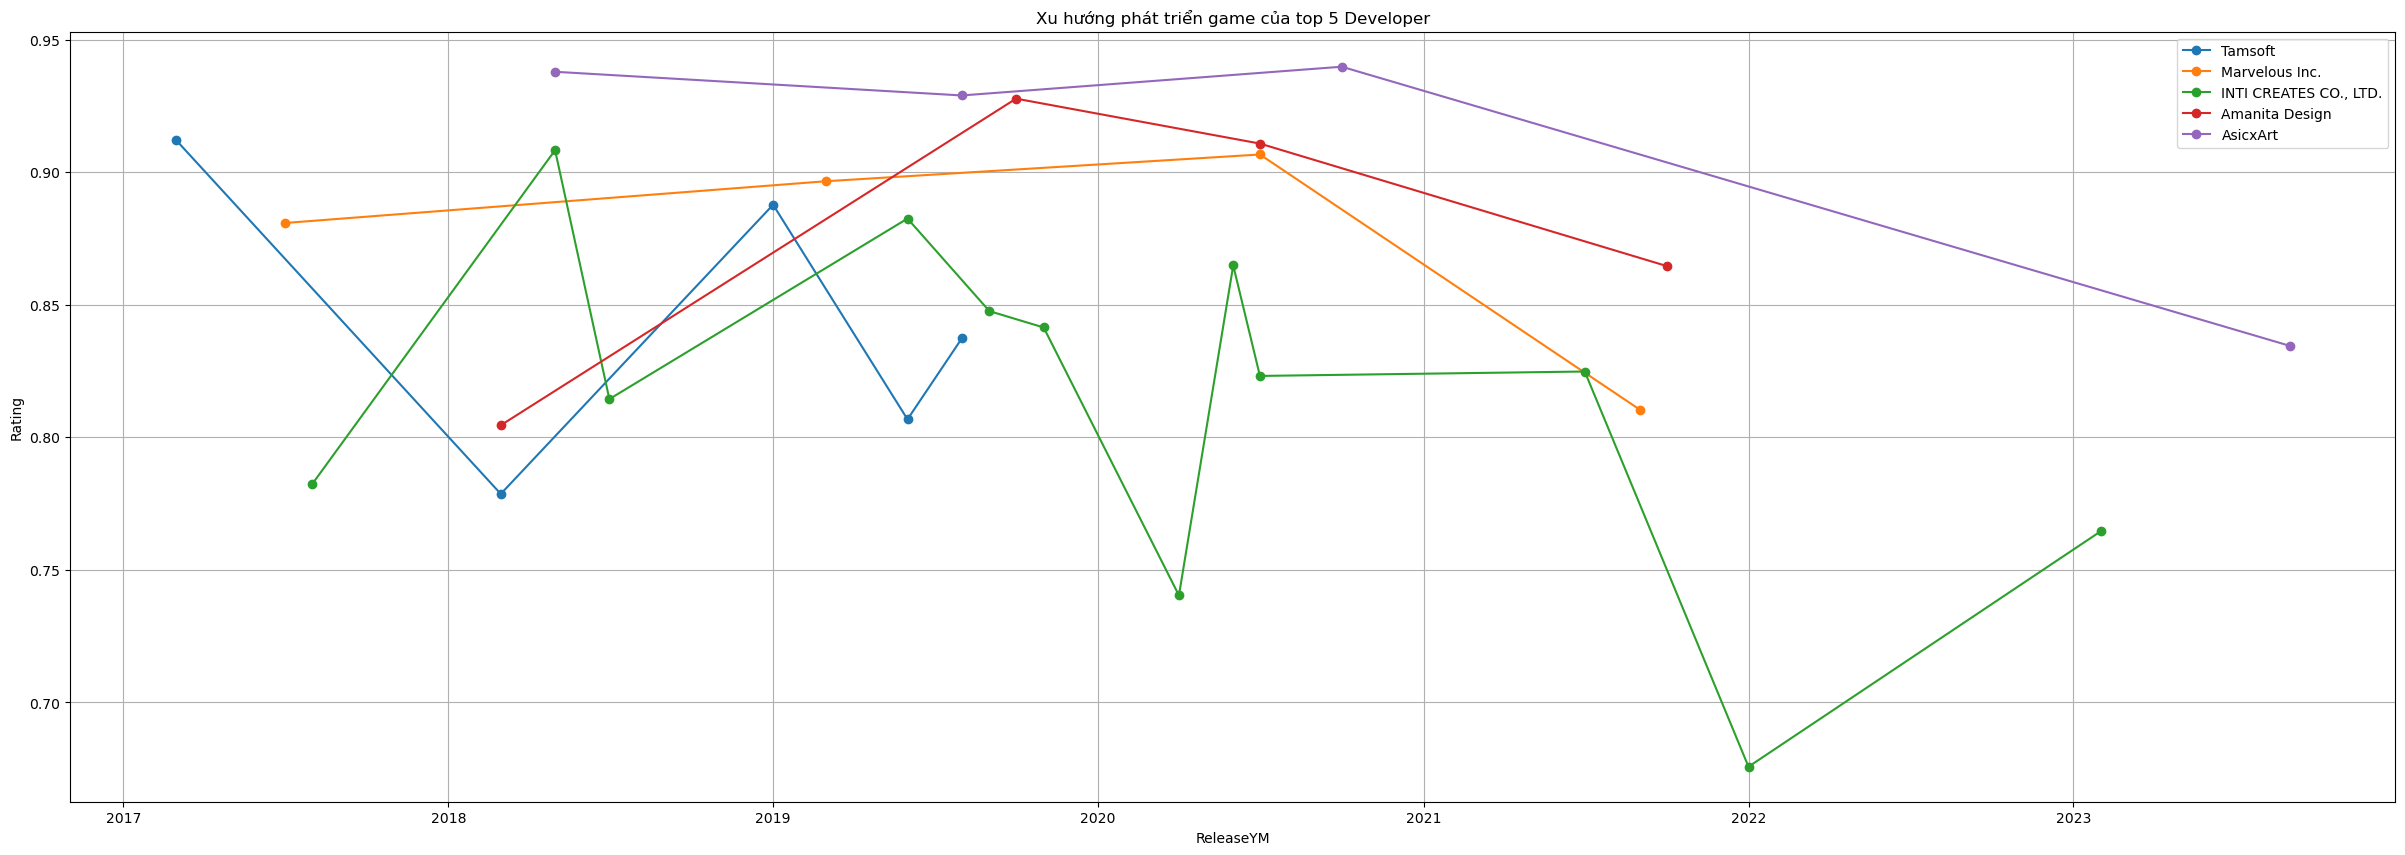

In [ ]:
# List 10 developer's names
developer_names = list(top5_dev_df['Developer'].unique())
developer_names

list_date = top5_dev_df['ReleaseYM'].sort_values().unique()
list_date
# Convert list_date to DataFrame
list_date_df = pd.DataFrame(list_date, columns=['ReleaseYM'])

# Plot chart
plt.figure(figsize=(30,10))

for i in range(5):
    dev_df = grouped_df.get_group(developer_names[i]).sort_values(by=['ReleaseYM'])
    
    # Merge list_date_df and dev_df
    merged_df = pd.merge(list_date_df, dev_df, on='ReleaseYM', how='left')

    # Fill missing values with None
    merged_df['Rating'].fillna(value=np.nan, inplace=True)

    # Ensure 'ReleaseYM' is in datetime format
    merged_df['ReleaseYM'] = pd.to_datetime(merged_df['ReleaseYM'])

    mask = np.isfinite(merged_df['Rating'])
    plt.plot(merged_df['ReleaseYM'][mask], merged_df['Rating'][mask], linestyle='-', marker='o', label=developer_names[i])

plt.title("Xu hướng phát triển game của top 5 Developer")
plt.xlabel("ReleaseYM")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

**Nhận xét**:
- Nhìn chung các game của top 5 Developer không có xu hướng phát triển ổn định (lúc cao lúc thấp), tuy nhiên rating đều trên 0.6 - một mức khá.
- 